In [1]:
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt
import itertools as it

In [2]:
# 'non-invasive', 'multifocal', 'tumour<1cm, grade 1', 'tumour>2cm, grade 2'
var = input()

 multifocal


In [3]:
data = pd.read_csv("./data/testset_set_echte_data1_uitgebreid.csv", sep=';', on_bad_lines='skip')
data = data[data['F20DEATHCAU'] == "Kanker"]
data = data[data['RF01INC01'] == var]

In [4]:
data.head()

,BIRTHDAT,BIRTHDATANON,REGDAT,AGEREG,REGMON,REGQRT,REGYR,F01PHYSCOPY,F01PHYS,F01INC01,...,genprof,radioth,rtontv,startdatrt,stopdatrt,gebjaar,panrpre,palabpre,panr,"palab,,,"
0,24-12-1930,1-1-1925,18-9-2006,71,2010/01,Q3/2020,2013,Dr. Robbert Willems,Dr. Robbert Willems,"tumour<1cm, grade 1",...,1,Onbekend,Tomografie,23-6-1920,11-2-1927,1918,101-123456,68,101-123456,"78,,"
23,18-4-1930,1-1-1925,28-2-2009,79,2015/06,Q4/2020,2012,Dr. Robbert Willems,Dr. Robbert Willems,"tumour>2cm, grade 2",...,0,Onbekend,Tomografie,16-3-1923,14-4-1923,1931,101-123456,75,101-123456,"94,,"
37,11-9-1921,1-1-1925,10-11-2011,81,2016/09,Q3/2020,2012,Dr. Robbert Willems,Dr. Robbert Willems,"tumour>2cm, grade 2",...,0,Onbekend,Tomografie,3-12-1920,29-7-1920,1930,101-123456,22,101-123456,"23,,"
69,24-2-1928,1-1-1925,1-11-2010,79,2015/10,Q3/2017,2016,Dr. Anna Bakker,Dr. Pieter de Vries,multifocal,...,1,Onbekend,Tomografie,5-1-1928,18-10-1928,1925,101-123456,95,101-123456,"36,,,"
71,30-4-1927,1-1-1925,12-4-2015,73,2015/12,Q2/2017,2012,Dr. Pieter de Vries,Dr. Pieter de Vries,"tumour>2cm, grade 2",...,0,Onbekend,Tomografie,13-4-1930,11-2-1925,1933,101-123456,46,101-123456,"99,,"


In [5]:
data['REGDAT'] = pd.to_datetime(data['REGDAT'], dayfirst=True, errors='coerce')
data['BIRTHDAT'] = pd.to_datetime(data['BIRTHDAT'], dayfirst=True, errors='coerce')


data['TIME'] = (data['REGDAT'] - data['BIRTHDAT']).dt.days // 365

In [6]:
data.dtypes

BIRTHDAT        datetime64[ns]
BIRTHDATANON            object
REGDAT          datetime64[ns]
AGEREG                   int64
REGMON                  object
                     ...      
panrpre                 object
palabpre                 int64
panr                    object
palab,,,                object
TIME                     int64
Length: 218, dtype: object

In [7]:
data.tail()




,BIRTHDAT,BIRTHDATANON,REGDAT,AGEREG,REGMON,REGQRT,REGYR,F01PHYSCOPY,F01PHYS,F01INC01,...,radioth,rtontv,startdatrt,stopdatrt,gebjaar,panrpre,palabpre,panr,"palab,,,",TIME
2124,1930-09-13,1-1-1925,2005-11-08,74,2015/02,Q2/2015,2020,Dr. Pieter de Vries,Dr. Anna Bakker,multifocal,...,Onbekend,Tomografie,1-4-1929,8-6-1928,1914,101-123456,31,101-123456,"8,,,",75
2140,1930-05-15,1-1-1925,2014-07-16,78,2021/06,Q2/2020,2020,Dr. Anna Bakker,Dr. Sophie Jansen,multifocal,...,Onbekend,Tomografie,16-3-1923,8-8-1921,1920,101-123456,102,101-123456,"83,",84
2168,1929-10-20,1-1-1925,2015-04-12,75,2014/06,Q4/2013,2017,Dr. Anna Bakker,Dr. Robbert Willems,non-invasive,...,Onbekend,Tomografie,7-1-1924,8-6-1928,1924,101-123456,75,101-123456,"57,,,",85
2170,1929-05-09,1-1-1925,2007-05-27,68,2015/11,Q1/2020,2018,Dr. Robbert Willems,Dr. Sophie Jansen,non-invasive,...,Onbekend,Tomografie,11-4-1922,15-3-1927,1924,101-123456,62,101-123456,"19,,",78
2182,1921-04-19,1-1-1925,2006-09-18,90,2015/02,Q1/2011,2007,Dr. Pieter de Vries,Dr. Pieter de Vries,multifocal,...,Onbekend,Tomografie,9-7-1920,8-8-1925,1917,101-123456,62,101-123456,"26,,,",85


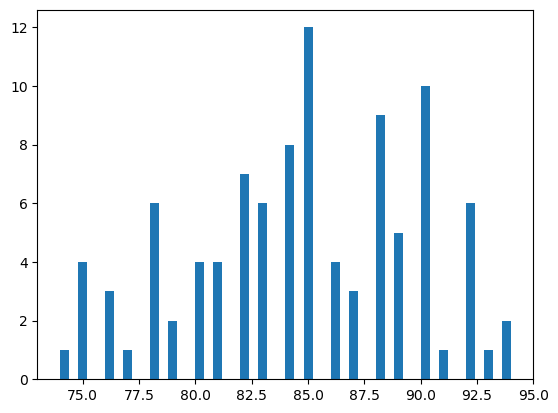

In [8]:
time = "TIME"
event = "F20CRF"
method = "chemo"
method1 = "later"
method2 = "hormonth"
method3 = "neoadjther"
T = data[time]
E = data[event]
plt.hist(T, bins = 50)
plt.show()

<Axes: xlabel='timeline'>

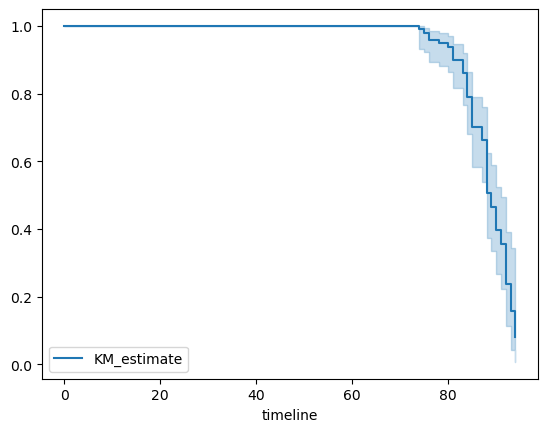

In [9]:
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()


In [10]:
cph = CoxPHFitter()
columns = [time, event, method, method1, method2, method3]
cph.fit(data[columns], duration_col = time, event_col = event)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 99 total observations, 55 right-censored observations>
             duration col = 'TIME'
                event col = 'F20CRF'
      baseline estimation = breslow
   number of observations = 99
number of events observed = 44
   partial log-likelihood = -154.32
         time fit was run = 2025-05-27 11:30:01 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
chemo       -0.59       0.56       0.29            -1.16            -0.02                 0.31                 0.98
later        0.30       1.34       0.33            -0.34             0.94                 0.71                 2.55
hormonth     0.08       1.09       0.27            -0.45             0.62                 0.64                 1.86
neoadjther   0.18       1.19       0.31            -0.42             0.78                 0.65                 2.18

             cmp to     z    p   -log2(p)
covariate                                
chemo          0.00 -2.03 0.04       4.55
later          0.00  0.91 0.36       1.46
hormonth       0.00  0.31 0.76       0.40
neoadjther     0.00  0.58 0.56       0.83
---
Concordance = 0.58
Partial AIC = 316.64
log-likelihood ratio test = 4.83 on 4 df
-log2(p) of ll-ratio test = 1.71

<Axes: xlabel='log(HR) (95% CI)'>

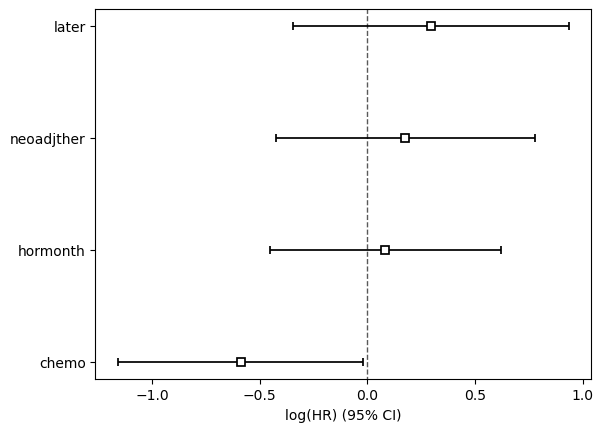

In [11]:
cph.plot()

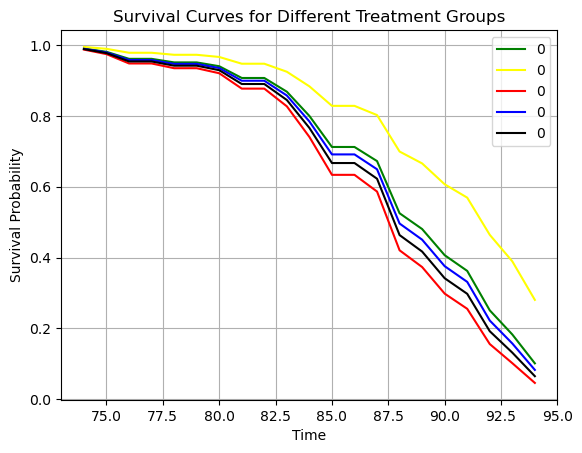

In [12]:
group_1 = pd.DataFrame({ method : [0], method1 : [0], method2: [0], method3: [0]})
group_2 = pd.DataFrame({ method : [1], method1 : [0], method2: [0], method3: [0]})
group_3 = pd.DataFrame({ method : [0], method1 : [1], method2: [0], method3: [0]})
group_4 = pd.DataFrame({ method : [0], method1 : [0], method2: [1], method3: [0]})
group_5 = pd.DataFrame({ method : [0], method1 : [0], method2: [0], method3: [1]})

ax = cph.predict_survival_function(group_1).plot(label="Chemo=0, Later=0, hormonth=0, neoadjther=0", linestyle='-', color="green")
cph.predict_survival_function(group_2).plot(ax=ax, label="Chemo=1, Later=0, hormonth=0, neoadjther=0", linestyle='-', color="yellow")
cph.predict_survival_function(group_3).plot(ax=ax, label="Chemo=0, Later=1, hormonth=0, neoadjther=0", linestyle='-', color="red")
cph.predict_survival_function(group_4).plot(ax=ax, label="Chemo=0, Later=0, hormonth=1, neoadjther=0", linestyle='-', color="blue")
cph.predict_survival_function(group_5).plot(ax=ax, label="Chemo=0, Later=0, hormonth=0, neoadjther=1", linestyle='-', color="black")


# Finalize plot
plt.title("Survival Curves for Different Treatment Groups")
plt.xlabel("Time")

plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend()
plt.show()